# Outliers



In [1]:
import matplotlib as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv(r"C:\Users\elish\Desktop\bureau hp\ds\project ML\data_preparation_23_03_25.csv")
df

,Unnamed: 0,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,...,subgenre_Hip-Hop / Rap,subgenre_Pop,subgenre_Rock,subgenre_Tropical / World,subgenre_Alternative / Indie.1,subgenre_Electronic.1,subgenre_Hip-Hop / Rap.1,subgenre_Pop.1,subgenre_Rock.1,subgenre_Tropical / World.1
0,0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,0.682,0.401,2,-10.068,...,False,False,True,False,False,False,False,False,True,False
1,1,002xjHwzEx66OWFV2IP9dk,Other,15,1ficfUnZMaY1QkNp15Slzm,2018-01-26,0.582,0.704,5,-6.242,...,False,False,False,False,True,False,False,False,False,False
2,2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,0.303,0.880,9,-4.739,...,False,False,True,False,False,False,False,False,True,False
3,3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,0.659,0.794,10,-5.644,...,False,False,False,False,False,True,False,False,False,False
4,4,008rk8F6ZxspZT4bUlkIQG,Other,38,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,0.662,0.838,1,-6.300,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,28351,7zxRMhXxJMQCeDDg0rKAVo,nav,72,4JR29CNW14Zc4Z5vflxkoJ,2017-02-24,0.744,0.715,0,-6.103,...,False,False,True,False,False,False,False,False,True,False
28352,28352,7zyLObYw4QUKQDyZOb4J0Y,father mc,36,14HYMxFhpgDIr9cci1u0kt,2010-10-01,0.832,0.666,1,-4.920,...,False,False,False,False,True,False,False,False,False,False
28353,28353,7zycSpvjDcqh6YT1FEl2kY,nicki minaj,49,5qs8T6ZHSrnllnOuUk6muC,2014-12-15,0.963,0.603,2,-6.224,...,False,False,False,False,False,True,False,False,False,False
28354,28354,7zye9v6B785eFWEFYs13C2,Other,40,1xdgLmTFMSyJyI5DJOOX7T,2013-07-09,0.458,0.540,5,-6.457,...,False,False,False,False,True,False,False,False,False,False


In [4]:
# Remove the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Display the first rows after removal
df.head()


,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,...,subgenre_Hip-Hop / Rap,subgenre_Pop,subgenre_Rock,subgenre_Tropical / World,subgenre_Alternative / Indie.1,subgenre_Electronic.1,subgenre_Hip-Hop / Rap.1,subgenre_Pop.1,subgenre_Rock.1,subgenre_Tropical / World.1
0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,0.682,0.401,2,-10.068,1,...,False,False,True,False,False,False,False,False,True,False
1,002xjHwzEx66OWFV2IP9dk,Other,15,1ficfUnZMaY1QkNp15Slzm,2018-01-26,0.582,0.704,5,-6.242,1,...,False,False,False,False,True,False,False,False,False,False
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,0.303,0.880,9,-4.739,1,...,False,False,True,False,False,False,False,False,True,False
3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,0.659,0.794,10,-5.644,0,...,False,False,False,False,False,True,False,False,False,False
4,008rk8F6ZxspZT4bUlkIQG,Other,38,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,0.662,0.838,1,-6.300,1,...,False,True,False,False,False,False,False,True,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28356 entries, 0 to 28355
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        28356 non-null  object 
 1   track_artist                    28350 non-null  object 
 2   track_popularity                28356 non-null  int64  
 3   track_album_id                  28356 non-null  object 
 4   track_album_release_date        28356 non-null  object 
 5   danceability                    28356 non-null  float64
 6   energy                          28356 non-null  float64
 7   key                             28356 non-null  int64  
 8   loudness                        28356 non-null  float64
 9   mode                            28356 non-null  int64  
 10  speechiness                     28356 non-null  float64
 11  acousticness                    28356 non-null  float64
 12  instrumentalness                

In [6]:
# Transform popularity using log to reduce the impact of the peak at 0
df['popularity_log'] = np.log1p(df['track_popularity'])


In [7]:
# Select only numeric columns
con_col = df.select_dtypes(include=['number'])


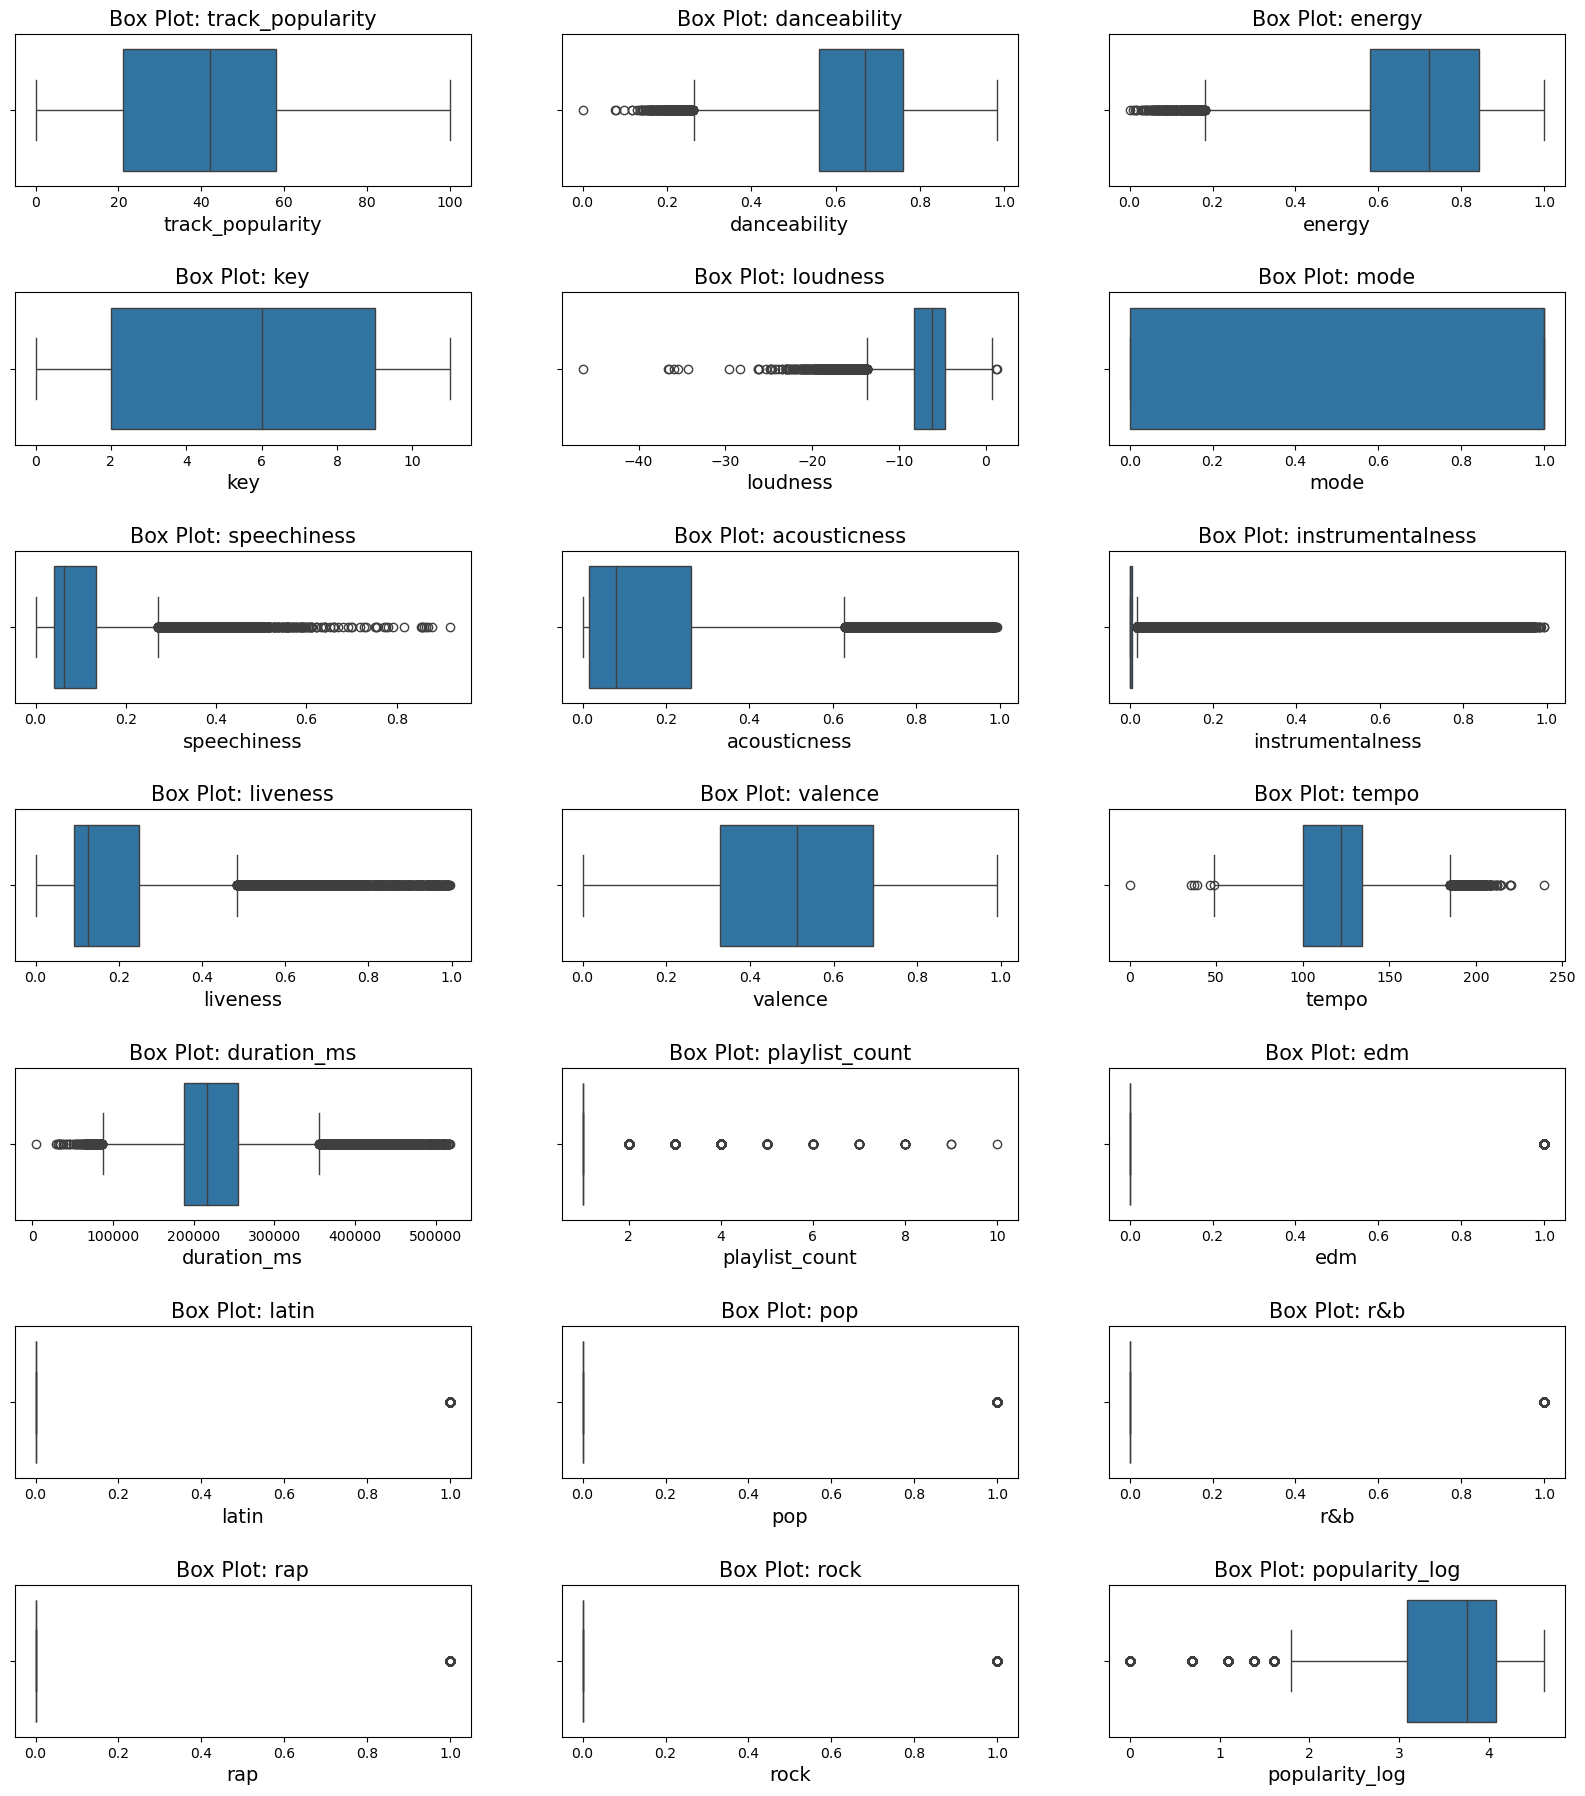

In [8]:

def outliers_boxplot(df, con_col):
    plt.figure(figsize=(20, 200))
    for i, col in enumerate(con_col):  # cols is a list of numeric columns
        ax = plt.subplot(60, 3, i+1)
        sb.boxplot(data=df, x=col, ax=ax)
        plt.title(f'Box Plot: {col}', fontsize=15)
        plt.xlabel(f'{col}', fontsize=14)
    plt.subplots_adjust(hspace=0.7)
    plt.show()
    
# Call the function with df and numeric_columns
outliers_boxplot(df, con_col)

IQR method for identifying outliers to set up a boundary outside of Q1 and Q3

In [9]:

def outliers_df(df, con_col):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    
    for col in con_col:  # # Ensure processing numeric columns only
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        # Filter rows that are outliers in either direction
        num_outliers = ((df[col] > upper_limit) | (df[col] < lower_limit)).sum()

        
        total_outliers.loc[col] = [num_outliers, (num_outliers / len(df)) * 100]

    # Only return columns with outliers (> 0%)
    return total_outliers[total_outliers['Percent'] > 0]

# Assuming df is your DataFrame and con_col is the list of numeric columns
outliers_df = outliers_df(df, con_col).sort_values('Percent', ascending=False)
outliers_df



,Outlier count,Percent
instrumentalness,6085.0,21.459303
edm,5537.0,19.526732
rap,5486.0,19.346875
r&b,5138.0,18.119622
pop,5132.0,18.098462
latin,4641.0,16.366906
rock,4451.0,15.696854
popularity_log,4057.0,14.307378
playlist_count,3166.0,11.165185
speechiness,2725.0,9.609959


In [10]:
#Outlier count: The number of outliers in each column.
#Percent: The percentage of outliers in each column.

Labeling every outlier with 'Outlier'

In [11]:

def outliers(df, outliers_df):
    label_out_df = df.copy()        # Create a copy of the input DataFrame to avoid modifying the original data

    for col in outliers_df.index:  # # Iterate over only column with outliers 
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q3 + 1.5 * IQR
            lower_limit = Q1 - 1.5 * IQR

            # Replace outlier values with 'Outlier'
            label_out_df[col] = np.where(
                (label_out_df[col] > upper_limit) | (label_out_df[col] < lower_limit), 
                'Outlier', 
                label_out_df[col]
            )

    return label_out_df

# Call the function with the previously generated `outliers_summary`
new_df_outliers = outliers(df, outliers_df)

# Display the first 10 rows
new_df_outliers.head(10)





,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,...,subgenre_Pop,subgenre_Rock,subgenre_Tropical / World,subgenre_Alternative / Indie.1,subgenre_Electronic.1,subgenre_Hip-Hop / Rap.1,subgenre_Pop.1,subgenre_Rock.1,subgenre_Tropical / World.1,popularity_log
0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,0.682,0.401,2,-10.068,1,...,False,True,False,False,False,False,False,True,False,3.7376696182833684
1,002xjHwzEx66OWFV2IP9dk,Other,15,1ficfUnZMaY1QkNp15Slzm,2018-01-26,0.582,0.704,5,-6.242,1,...,False,False,False,True,False,False,False,False,False,2.772588722239781
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,0.303,0.88,9,-4.739,1,...,False,True,False,False,False,False,False,True,False,3.367295829986474
3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,0.659,0.794,10,-5.644,0,...,False,False,False,False,True,False,False,False,False,3.2188758248682006
4,008rk8F6ZxspZT4bUlkIQG,Other,38,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,0.662,0.838,1,-6.3,1,...,True,False,False,False,False,False,True,False,False,3.6635616461296463
5,00EPIEnX1JFjff8sC6bccd,thalía,12,2phs92sMy029JvPDFXUpCC,2018-06-01,0.836,0.799,7,-4.247,0,...,False,False,False,False,False,True,False,False,False,2.5649493574615367
6,00FR9VQ0uzF4NNxVKKiMz2,Other,41,3xpDg9THHn3h4wX1Jyz9TT,1997-01-01,0.389,0.616,1,-8.747,0,...,False,False,False,True,False,False,False,False,False,3.7376696182833684
7,00FROhC5g4iJdax5US8jRr,diddy,52,2dHr0LpUe6CNV5lNsr8x0W,1999-08-24,0.764,0.594,6,-10.05,1,...,False,False,False,True,False,False,False,False,False,3.970291913552122
8,00GfGwzlSB8DoA0cDP2Eit,babyface,36,51fAXJ5bMn7DRSunXQ6PMb,1989-07-07,0.743,0.86,5,-6.346,1,...,False,False,False,True,False,False,False,False,False,3.6109179126442243
9,00Gu3RMpDW2vO9PjlMVFDL,blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,2019-06-21,0.573,0.746,10,-4.894,1,...,False,False,False,False,True,False,False,False,False,3.7612001156935624


Crearting df_outliers with dummies

In [12]:
##df_outliers. Creating a dataframe with outliers as 1 and non-outliers as 0:

df_outliers = new_df_outliers.isin(['Outlier'])
df_outliers = df_outliers.astype('int')
df_outliers

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,...,subgenre_Pop,subgenre_Rock,subgenre_Tropical / World,subgenre_Alternative / Indie.1,subgenre_Electronic.1,subgenre_Hip-Hop / Rap.1,subgenre_Pop.1,subgenre_Rock.1,subgenre_Tropical / World.1,popularity_log
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


creating df without ouliers so we can compare the corr and distribution in both datasets

In [13]:

def capping(df):
    temp = df.copy()   # Create a copy of the DataFrame to avoid modifying the original one
    for col in temp:
        if col in outliers_df.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q1 + 1.5 * IQR
            lower_limit = Q3 - 1.5 * IQR
            
            # Replace outlier values with 'NaN'
            temp[col] = np.where((temp[col] > upper_limit) | (temp[col] < lower_limit), np.nan, temp[col])
    return temp

# Apply the capping function to the DataFrame
temp = capping(df)
display(temp.shape)
temp.head(10)



(28356, 37)

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,...,subgenre_Pop,subgenre_Rock,subgenre_Tropical / World,subgenre_Alternative / Indie.1,subgenre_Electronic.1,subgenre_Hip-Hop / Rap.1,subgenre_Pop.1,subgenre_Rock.1,subgenre_Tropical / World.1,popularity_log
0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,0.682,NaN,2,-10.068,1,...,False,True,False,False,False,False,False,True,False,3.737670
1,002xjHwzEx66OWFV2IP9dk,Other,15,1ficfUnZMaY1QkNp15Slzm,2018-01-26,0.582,0.704,5,-6.242,1,...,False,False,False,True,False,False,False,False,False,2.772589
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,NaN,0.880,9,-4.739,1,...,False,True,False,False,False,False,False,True,False,3.367296
3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,0.659,0.794,10,-5.644,0,...,False,False,False,False,True,False,False,False,False,3.218876
4,008rk8F6ZxspZT4bUlkIQG,Other,38,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,0.662,0.838,1,-6.300,1,...,True,False,False,False,False,False,True,False,False,3.663562
5,00EPIEnX1JFjff8sC6bccd,thalía,12,2phs92sMy029JvPDFXUpCC,2018-06-01,0.836,0.799,7,-4.247,0,...,False,False,False,False,False,True,False,False,False,NaN
6,00FR9VQ0uzF4NNxVKKiMz2,Other,41,3xpDg9THHn3h4wX1Jyz9TT,1997-01-01,NaN,0.616,1,-8.747,0,...,False,False,False,True,False,False,False,False,False,3.737670
7,00FROhC5g4iJdax5US8jRr,diddy,52,2dHr0LpUe6CNV5lNsr8x0W,1999-08-24,0.764,0.594,6,-10.050,1,...,False,False,False,True,False,False,False,False,False,3.970292
8,00GfGwzlSB8DoA0cDP2Eit,babyface,36,51fAXJ5bMn7DRSunXQ6PMb,1989-07-07,0.743,0.860,5,-6.346,1,...,False,False,False,True,False,False,False,False,False,3.610918
9,00Gu3RMpDW2vO9PjlMVFDL,blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,2019-06-21,0.573,0.746,10,-4.894,1,...,False,False,False,False,True,False,False,False,False,3.761200


In [14]:
temp.isna().sum()

track_id                             0
track_artist                         6
track_popularity                     0
track_album_id                       0
track_album_release_date             0
danceability                      4738
energy                            3401
key                                  0
loudness                          4965
mode                                 0
speechiness                       5240
acousticness                      4695
instrumentalness                  6644
liveness                          4503
valence                              0
tempo                             5439
duration_ms                       5680
playlist_count                    3166
edm                               5537
latin                             4641
pop                               5132
r&b                               5138
rap                               5486
rock                              4451
subgenre_Alternative / Indie         0
subgenre_Electronic      

In [15]:
# fill outliers that with "NAN" with mice methood to fill missing data
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer, KNNImputer
import pandas as pd

# Copy the DataFrame to avoid modifying the original one
df_mice = temp.copy()

# Select only numeric columns for imputation
numeric_cols = df_mice.select_dtypes(include=['number']).columns

# MICE Imputation (Multiple Imputation by Chained Equations) using IterativeImputer from sklearn
mice_imputer = IterativeImputer(random_state=42, max_iter=10, tol=1e-3, n_nearest_features=5, min_value=0)
df_mice_imputed = mice_imputer.fit_transform(df_mice[numeric_cols])

# Convert the result to a DataFrame
df_mice_imputed = pd.DataFrame(df_mice_imputed, columns=numeric_cols)

# Check if imputation worked correctly
print("\nAfter MICE Imputation:")
print(pd.DataFrame(df_mice_imputed).isna().sum())

# If you want to include the non-numeric columns back into the imputed DataFrame, you can re-merge them:
df_mice[numeric_cols] = df_mice_imputed
df.info()


After MICE Imputation:
track_popularity    0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
playlist_count      0
edm                 0
latin               0
pop                 0
r&b                 0
rap                 0
rock                0
popularity_log      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28356 entries, 0 to 28355
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        28356 non-null  object 
 1   track_artist                    28350 non-null  object 
 2   track_popularity                28356 non-null  int64  
 3   track_album_id                  28356 non-null  object 
 4   track_album_release_d

In [16]:
#Saving the inter quartal outliers dataframe for future reference.
temp.to_csv('outliers_q_df.csv')

Checking if distribution and/or correlation (spearman) has changed significantly:

In [17]:
### differences between two correlation in Python: https://github.com/psinger/CorrelationStats
### We will only take from the code the Fisher method for two-tailed test
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

A table indicating changes

In [18]:
from scipy.stats import norm, ks_2samp
import numpy as np
import pandas as pd

c = con_col
names = c

# Creating df that reflects the correlation change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

# A copy of numeric df
no_outliers = con_col.copy()
np.seterr(divide='ignore', invalid='ignore')

rows = []  # Collect rows here to avoid repeatedly modifying the DataFrame
for i in names:
    # Data with outliers
    out = con_col[i]
    # Data without outliers
    non = con_col[i].loc[df_outliers[i] == 0]
    # Labels with outliers
    popularity_out = con_col['track_popularity']
    # Labels without outliers
    popularity_non = con_col['track_popularity'].loc[df_outliers[i] == 0]

    # Correlation p-value
    p, pvalue = cocor(out, popularity_out, non, popularity_non)
    cor_change = np.where(pvalue < 0.05, '+', '-')
    # Outliers count
    mv = df_outliers.sum()
    # KS test p-value
    pval = ks_2samp(out, non)[1]
    dist_change = np.where(pval < 0.05, '+', '-')

    # Append the data as a dictionary
    rows.append({
        'feature': i,
        'outliers_cnt': mv,
        'distribution_changed': dist_change,
        'correlation_changed': cor_change
    })

# Use pd.DataFrame to create out_df from rows
out_df = pd.DataFrame(rows)

# Display the first 10 rows
out_df.head(10)

,feature,outliers_cnt,distribution_changed,correlation_changed
0,track_popularity,track_id 0 track_a...,-,-
1,danceability,track_id 0 track_a...,-,-
2,energy,track_id 0 track_a...,-,-
3,key,track_id 0 track_a...,-,-
4,loudness,track_id 0 track_a...,+,-
5,mode,track_id 0 track_a...,-,-
6,speechiness,track_id 0 track_a...,+,-
7,acousticness,track_id 0 track_a...,+,-
8,instrumentalness,track_id 0 track_a...,+,+
9,liveness,track_id 0 track_a...,+,+


In [19]:
#All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution. 
#We don't want to delete vars that will change the distribution
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+')& (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,track_popularity,track_id 0 track_a...,-,-,yes
1,danceability,track_id 0 track_a...,-,-,yes
2,energy,track_id 0 track_a...,-,-,yes
3,key,track_id 0 track_a...,-,-,yes
4,loudness,track_id 0 track_a...,+,-,yes
5,mode,track_id 0 track_a...,-,-,yes
6,speechiness,track_id 0 track_a...,+,-,yes
7,acousticness,track_id 0 track_a...,+,-,yes
8,instrumentalness,track_id 0 track_a...,+,+,no
9,liveness,track_id 0 track_a...,+,+,no


In [20]:
out_df.groupby('drop').size()

drop
no      3
yes    18
dtype: int64

In [21]:
# Getting relevant columns and features
relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
relevant_columns_features

0     track_popularity
1         danceability
2               energy
3                  key
4             loudness
5                 mode
6          speechiness
7         acousticness
10             valence
11               tempo
13      playlist_count
14                 edm
15               latin
16                 pop
17                 r&b
18                 rap
19                rock
20      popularity_log
Name: feature, dtype: object

The columns `playlist_count`, `edm`, `latin`, `pop`, `r&b`, `rap` and `rock` are not relevant as they were derived through calculations

In [22]:
# List of outlier columns to remove espect 'track_popularity' since it is the target
remove_outliers=['loudness', 'speechiness','acousticness', 'tempo']
remove_outliers

['loudness', 'speechiness', 'acousticness', 'tempo']

Removing outleirs that don't change correlation

In [23]:
# Reset the index to be consecutive integers for both df and df_outliers
df_outliers = df_outliers.reset_index(drop=True)
df = df.reset_index(drop=True)

# Copying and manipulating data based on outliers
manipulated_data = df.copy()

# Ensure 'remove_outliers' is defined as the list of columns to check
for j in range(len(df)):  # Iterate over rows of the DataFrame
    for col in remove_outliers:  # Iterate over the columns to check for outliers
        if df_outliers.loc[j, col] == 1:  # If outlier is detected in the row for this column
            manipulated_data.loc[j, col] = np.nan  # Set the manipulated data to NaN where outlier is found (instead of 0)

# Check manipulated_data to confirm the changes
print("Columns with NaNs after removing outliers:")
print(manipulated_data[remove_outliers].isna().sum())  # This will show the count of NaNs in each column

# Optionally, you can check the first few rows of the manipulated data
print("First few rows of manipulated data:")
print(manipulated_data[remove_outliers].head())

Columns with NaNs after removing outliers:
loudness         837
speechiness     2725
acousticness    1911
tempo            494
dtype: int64
First few rows of manipulated data:
   loudness  speechiness  acousticness    tempo
0   -10.068       0.0236      0.279000   97.091
1    -6.242       0.0347      0.065100  150.863
2    -4.739       0.0442      0.011700  135.225
3    -5.644       0.0540      0.000761  128.041
4    -6.300       0.0499      0.114000  129.884


# Handling missing Values

Imputation of Missing Values in Continuous Columns Using MICE Imputation: The MICE algorithm replaces the NaN (outliers) with imputed values based on neighboring data points.

In [24]:
# Import the necessary components to enable IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the IterativeImputer for MICE
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply the imputer only on the columns with NaNs (outliers left as NaNs)
manipulated_data[remove_outliers] = mice_imputer.fit_transform(manipulated_data[remove_outliers])

# Check the imputed data
print("Data after MICE imputation:")
print(manipulated_data[remove_outliers].head())

# Optionally, check if there are any remaining NaNs
print("Total NaNs in the DataFrame after MICE imputation:")
print(manipulated_data.isna().sum())


Data after MICE imputation:
   loudness  speechiness  acousticness    tempo
0   -10.068       0.0236      0.279000   97.091
1    -6.242       0.0347      0.065100  150.863
2    -4.739       0.0442      0.011700  135.225
3    -5.644       0.0540      0.000761  128.041
4    -6.300       0.0499      0.114000  129.884
Total NaNs in the DataFrame after MICE imputation:
track_id                          0
track_artist                      6
track_popularity                  0
track_album_id                    0
track_album_release_date          0
danceability                      0
energy                            0
key                               0
loudness                          0
mode                              0
speechiness                       0
acousticness                      0
instrumentalness                  0
liveness                          0
valence                           0
tempo                             0
duration_ms                       0
playlist_count       

In [25]:
!pip install missingno

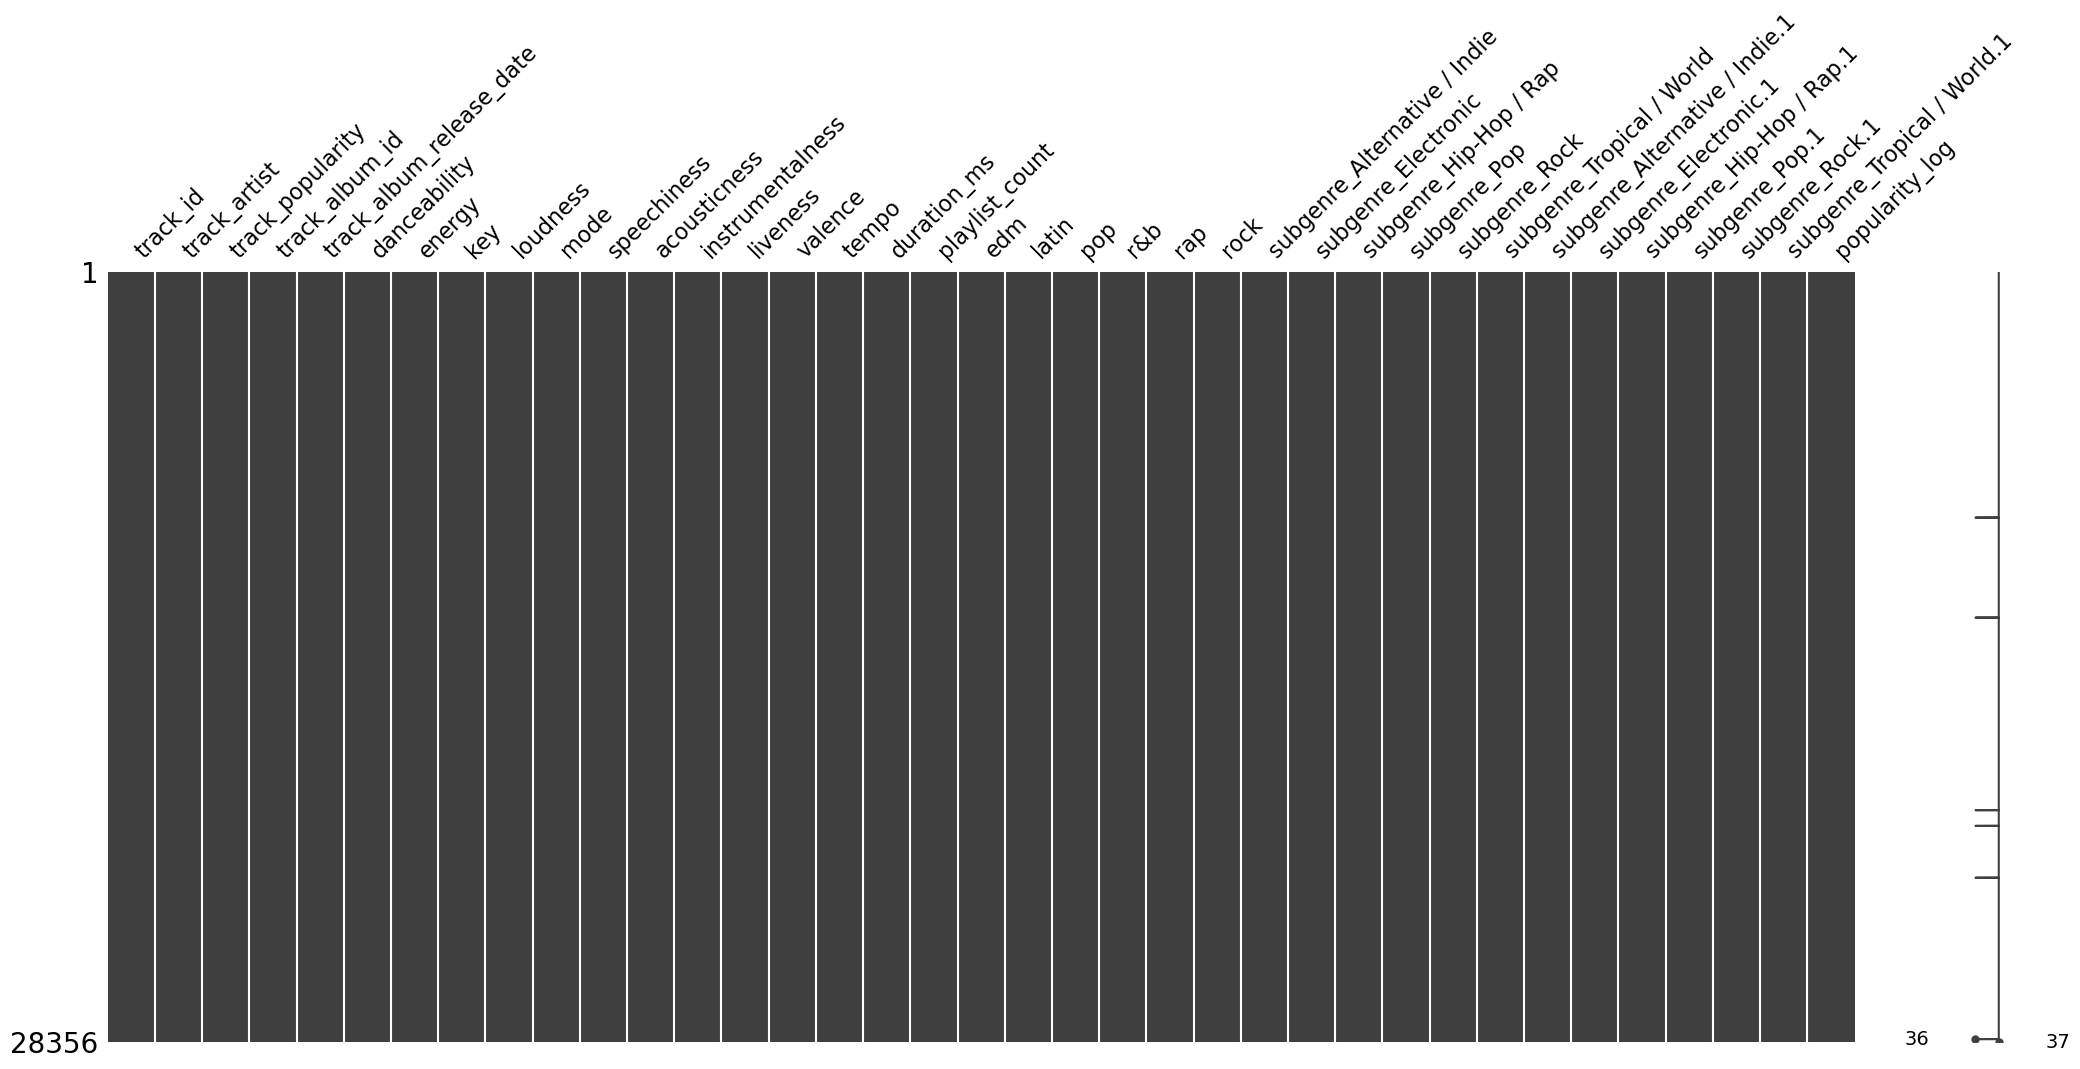

<Figure size 500x500 with 0 Axes>

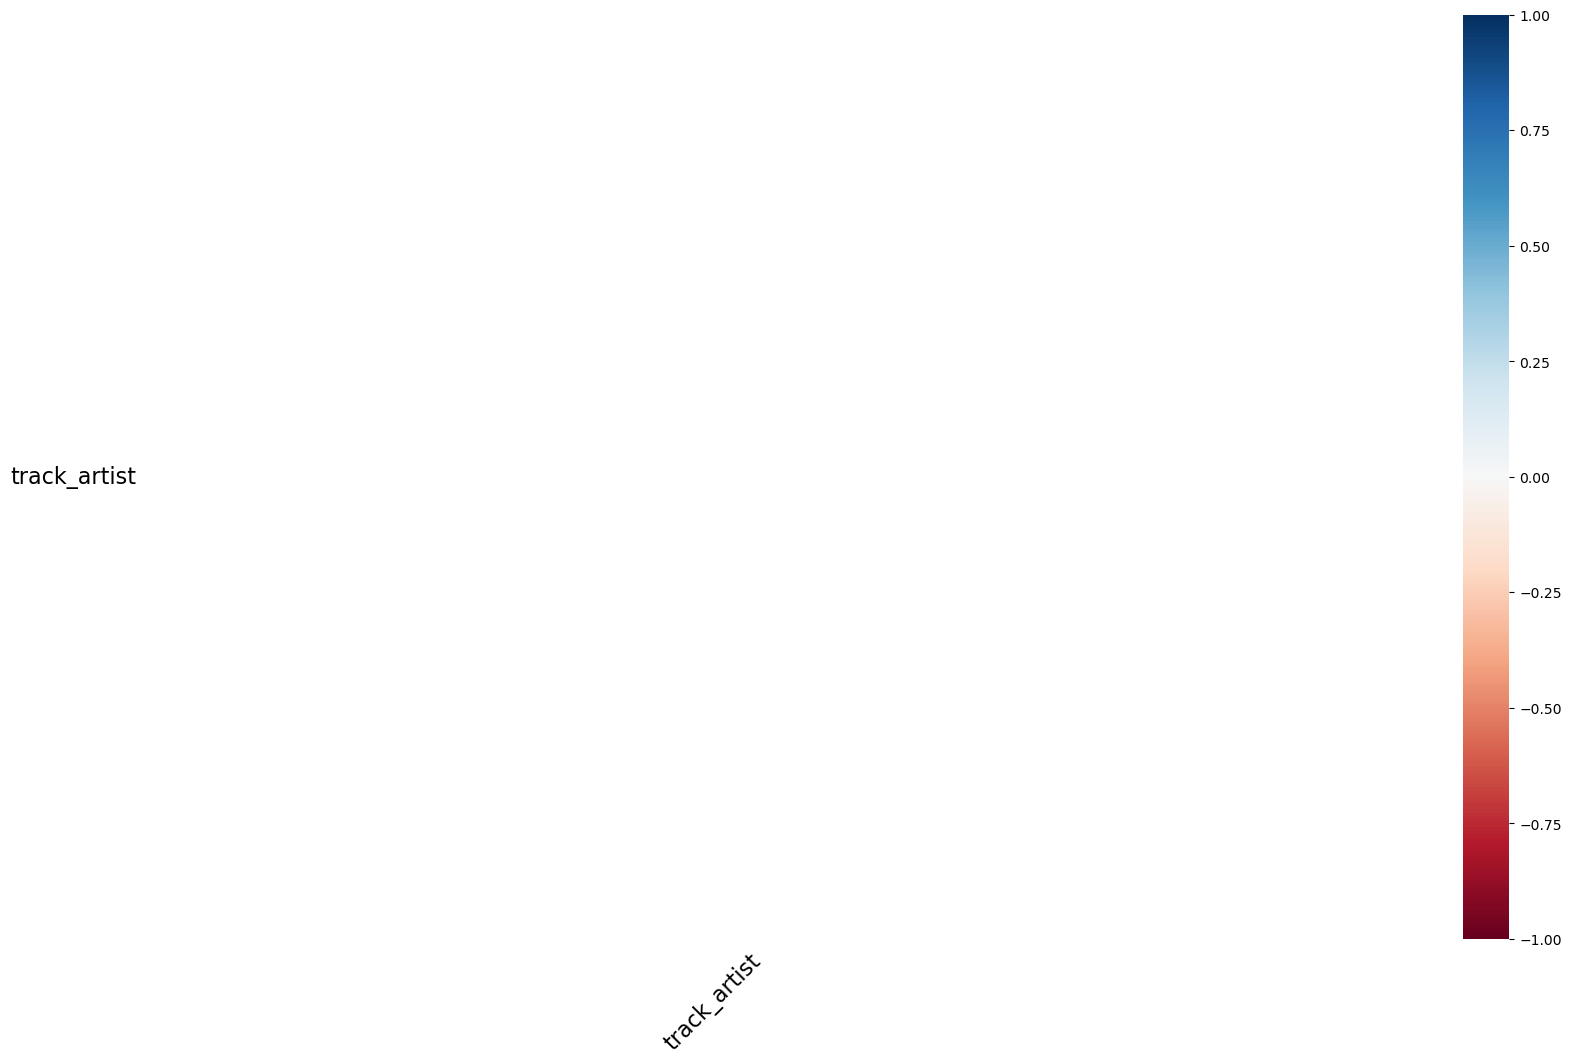

In [26]:

import missingno as msno  # Import missingno as msno

# Visualize the missing data matrix for the manipulated data
msno.matrix(manipulated_data)

# Visualize the missingness correlation heatmap
plt.figure(figsize=(5, 5))  # Adjust the figure size for heatmap
msno.heatmap(manipulated_data)
plt.show()

In [27]:

# Calculate the percentage of missing data for each column
missing_percent = df.isnull().mean() * 100

# Create a DataFrame to display the missing percentage for each column
missing_data_df = pd.DataFrame({
    'Missing Percentage': missing_percent
})

# Sort the DataFrame by missing percentage (optional)
missing_data_df = missing_data_df.sort_values(by='Missing Percentage', ascending=False)

# Display the results
print(missing_data_df)


                                Missing Percentage
track_artist                               0.02116
subgenre_Pop                               0.00000
pop                                        0.00000
r&b                                        0.00000
rap                                        0.00000
rock                                       0.00000
subgenre_Alternative / Indie               0.00000
subgenre_Electronic                        0.00000
subgenre_Hip-Hop / Rap                     0.00000
track_id                                   0.00000
latin                                      0.00000
subgenre_Tropical / World                  0.00000
subgenre_Alternative / Indie.1             0.00000
subgenre_Electronic.1                      0.00000
subgenre_Hip-Hop / Rap.1                   0.00000
subgenre_Pop.1                             0.00000
subgenre_Rock.1                            0.00000
subgenre_Tropical / World.1                0.00000
subgenre_Rock                  

`track_artist` is a object colomn, we have to encode before handling missing values

In [28]:
manipulated_data['track_artist'].fillna('Unknown Artist', inplace=True)

In [29]:
manipulated_data.isnull().sum()

track_id                          0
track_artist                      0
track_popularity                  0
track_album_id                    0
track_album_release_date          0
danceability                      0
energy                            0
key                               0
loudness                          0
mode                              0
speechiness                       0
acousticness                      0
instrumentalness                  0
liveness                          0
valence                           0
tempo                             0
duration_ms                       0
playlist_count                    0
edm                               0
latin                             0
pop                               0
r&b                               0
rap                               0
rock                              0
subgenre_Alternative / Indie      0
subgenre_Electronic               0
subgenre_Hip-Hop / Rap            0
subgenre_Pop                

# Pickle

In [31]:
manipulated_data.to_pickle('df_cleaned24b_03.pkl')

In [32]:
df = pd.read_pickle('df_cleaned24b_03.pkl')
df

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,danceability,energy,key,loudness,mode,...,subgenre_Pop,subgenre_Rock,subgenre_Tropical / World,subgenre_Alternative / Indie.1,subgenre_Electronic.1,subgenre_Hip-Hop / Rap.1,subgenre_Pop.1,subgenre_Rock.1,subgenre_Tropical / World.1,popularity_log
0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,0.682,0.401,2,-10.068,1,...,False,True,False,False,False,False,False,True,False,3.737670
1,002xjHwzEx66OWFV2IP9dk,Other,15,1ficfUnZMaY1QkNp15Slzm,2018-01-26,0.582,0.704,5,-6.242,1,...,False,False,False,True,False,False,False,False,False,2.772589
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,0.303,0.880,9,-4.739,1,...,False,True,False,False,False,False,False,True,False,3.367296
3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,0.659,0.794,10,-5.644,0,...,False,False,False,False,True,False,False,False,False,3.218876
4,008rk8F6ZxspZT4bUlkIQG,Other,38,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,0.662,0.838,1,-6.300,1,...,True,False,False,False,False,False,True,False,False,3.663562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,7zxRMhXxJMQCeDDg0rKAVo,nav,72,4JR29CNW14Zc4Z5vflxkoJ,2017-02-24,0.744,0.715,0,-6.103,1,...,False,True,False,False,False,False,False,True,False,4.290459
28352,7zyLObYw4QUKQDyZOb4J0Y,father mc,36,14HYMxFhpgDIr9cci1u0kt,2010-10-01,0.832,0.666,1,-4.920,0,...,False,False,False,True,False,False,False,False,False,3.610918
28353,7zycSpvjDcqh6YT1FEl2kY,nicki minaj,49,5qs8T6ZHSrnllnOuUk6muC,2014-12-15,0.963,0.603,2,-6.224,1,...,False,False,False,False,True,False,False,False,False,3.912023
28354,7zye9v6B785eFWEFYs13C2,Other,40,1xdgLmTFMSyJyI5DJOOX7T,2013-07-09,0.458,0.540,5,-6.457,0,...,False,False,False,True,False,False,False,False,False,3.713572


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28356 entries, 0 to 28355
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        28356 non-null  object 
 1   track_artist                    28356 non-null  object 
 2   track_popularity                28356 non-null  int64  
 3   track_album_id                  28356 non-null  object 
 4   track_album_release_date        28356 non-null  object 
 5   danceability                    28356 non-null  float64
 6   energy                          28356 non-null  float64
 7   key                             28356 non-null  int64  
 8   loudness                        28356 non-null  float64
 9   mode                            28356 non-null  int64  
 10  speechiness                     28356 non-null  float64
 11  acousticness                    28356 non-null  float64
 12  instrumentalness                

In [34]:
# Calculate the percentage of missing data for each column
missing_percent = df.isnull().mean() * 100

# Create a DataFrame to display the missing percentage for each column
missing_data_df = pd.DataFrame({
    'Missing Percentage': missing_percent
})

# Sort the DataFrame by missing percentage (optional)
missing_data_df = missing_data_df.sort_values(by='Missing Percentage', ascending=False)

# Display the results
print(missing_data_df)

                                Missing Percentage
track_id                                       0.0
latin                                          0.0
r&b                                            0.0
rap                                            0.0
rock                                           0.0
subgenre_Alternative / Indie                   0.0
subgenre_Electronic                            0.0
subgenre_Hip-Hop / Rap                         0.0
subgenre_Pop                                   0.0
subgenre_Rock                                  0.0
subgenre_Tropical / World                      0.0
subgenre_Alternative / Indie.1                 0.0
subgenre_Electronic.1                          0.0
subgenre_Hip-Hop / Rap.1                       0.0
subgenre_Pop.1                                 0.0
subgenre_Rock.1                                0.0
subgenre_Tropical / World.1                    0.0
pop                                            0.0
edm                            